In [1]:
import urllib
import json
import datetime

In [2]:
# grab the base data
DANE_URL = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.geojson?where=GEO%20%3D%20'County'%20AND%20NAME%20%3D%20'Dane'"
response = urllib.request.urlopen(DANE_URL)
dane_data = json.loads(response.read())
data_elems = dane_data['features']

In [3]:
# I guess WI DHS stoppped serving data in date order and does not use an ISO date format
def parse_date(dstring):
    date_part = dstring.split()[0]
    year,month,day = date_part.split('/')
    return datetime.date(int(year), int(month), int(day))

In [4]:
# first sort the data elements by date
de_date_tups = [(el,parse_date(el['properties']['DATE']).toordinal()) for el in data_elems]
de_date_tups = sorted(de_date_tups, key=lambda tup: tup[1])
# pull the elements back out in order
data_elems = [el[0] for el in de_date_tups]
# and pull out important values
new_neg = [el['properties']['NEG_NEW'] for el in data_elems]
new_pos = [el['properties']['POS_NEW'] for el in data_elems]

In [5]:
# now strip off missing data points from the front
def first_non_none(vals):
    for i in range(len(vals)):
        if vals[i] is not None:
            return i
    return len(vals)

# just in case one or the other has more missing samples
neg_start = first_non_none(new_neg)
pos_start = first_non_none(new_pos)
start = max(neg_start, pos_start)
# and reduce
new_neg = new_neg[start:]
new_pos = new_pos[start:]
new_tot = [new_neg[i] + new_pos[i] for i in range(len(new_neg))]
new_pos_perc = [float(new_pos[i]) / new_tot[i] for i in range(len(new_tot))]

In [6]:
# now get some sliding window sums for averaging
def sliding_window_sum(vals, window_size):
    # check for degenerate case
    if len(vals) < window_size:
        return [sum(vals)]
    # otherwise track each
    ret_sums = list()
    # get initial sum
    curr_sum = sum(vals[:window_size])
    ret_sums.append(curr_sum)
    # and iterate to the end
    i = window_size
    while i < len(vals):
        # take off the one before the window
        curr_sum -= vals[i - window_size]
        # and add the new val into the window
        curr_sum += vals[i]
        ret_sums.append(curr_sum)
        i += 1
    return ret_sums

In [7]:
# get a 7-day sliding average of positive percentages
new_tot_7win = sliding_window_sum(new_tot, 7)
new_pos_7win = sliding_window_sum(new_pos, 7)
new_pos_perc_7win = [float(new_pos_7win[i]) / new_tot_7win[i] for i in range(len(new_tot_7win))]

In [8]:
# grab last 8 weeks of real percentages and average
pos_perc_8wk = new_pos_perc[-56:]
pos_perc_8wk_7win = new_pos_perc_7win[-56:]

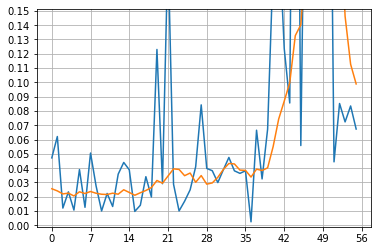

In [9]:
import matplotlib.pyplot as plt
# and plot
plt.plot(pos_perc_8wk)
plt.plot(pos_perc_8wk_7win)
plt.xticks([0, 7, 14, 21, 28, 35, 42, 49, 56])
plt.yticks([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15])
plt.ylim([-0.001, 0.151])
plt.grid()
plt.show()

In [10]:
pos_perc_8wk

[0.04716981132075472,
 0.06210191082802548,
 0.01209103840682788,
 0.0234375,
 0.01069364161849711,
 0.03901234567901234,
 0.01262135922330097,
 0.05055849500293945,
 0.027586206896551724,
 0.01007018614586512,
 0.022305909617612977,
 0.013186813186813187,
 0.03582089552238806,
 0.04399057344854674,
 0.038869257950530034,
 0.00975609756097561,
 0.01406799531066823,
 0.034031413612565446,
 0.019834710743801654,
 0.12296296296296297,
 0.02910958904109589,
 0.19411764705882353,
 0.028768699654775604,
 0.01008827238335435,
 0.016881827209533268,
 0.024859663191659984,
 0.04099142040038131,
 0.08422664624808576,
 0.03981797497155859,
 0.03820816864295125,
 0.02991162474507138,
 0.038866396761133605,
 0.04748603351955307,
 0.038135593220338986,
 0.03635204081632653,
 0.03816046966731898,
 0.0024834437086092716,
 0.06652046783625731,
 0.03247232472324723,
 0.06726457399103139,
 0.18223234624145787,
 0.20876288659793815,
 0.12371946414499606,
 0.08555133079847908,
 0.5558375634517766,
 0.05580